In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import re

# Data Cleaning

In [2]:
batting_odi = pd.read_csv("C:/Users/Deepam Ghosh/Desktop/Projects/Personal/Project-Cricket Analysis/cricinfo-statsguru-data/ODIs - Batting.csv")

In [3]:
batting_odi.head() #Top 5 rows

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,EJG Morgan (2009-2018),2009-2018,2009,2018,189,176,27,5813,124*,124,...,6310,92.12,10,36,11,England,1,1,0,1
1,IR Bell (2004-2015),2004-2015,2004,2015,161,157,14,5416,141,141,...,7019,77.16,4,35,6,England,1,1,0,0
2,PD Collingwood (2001-2011),2001-2011,2001,2011,197,181,37,5092,120*,120,...,6614,76.98,5,26,7,England,1,1,0,0
3,JE Root (2013-2018),2013-2018,2013,2018,121,115,19,4946,133*,133,...,5722,86.43,13,29,4,England,1,0,1,0
4,AJ Stewart (1989-2003),1989-2003,1989,2003,170,162,14,4677,116,116,...,6841,68.36,4,28,13,England,1,0,0,0


In [4]:
batting_odi.tail() # Bottom 5 rows

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
1979,Fareed Ahmad (2014-2017),2014-2017,2014,2017,5,2,2,1,1*,1,...,6,16.66,0,0,0,Afghanistan,1,0,0,0
1980,Naveen-ul-Haq (2016-2016),2016-2016,2016,2016,2,1,1,0,0*,0,...,1,0.00,0,0,0,Afghanistan,1,0,0,0
1981,Dawlat Ahmadzai (2009-2010),2009-2010,2009,2010,3,-,-,-,-,-,...,-,-,-,-,-,Afghanistan,1,0,0,0
1982,Mohibullah Oryakhel (2013-2013),2013-2013,2013,2013,2,-,-,-,-,-,...,-,-,-,-,-,Afghanistan,1,0,0,0
1983,Rokhan Barakzai (2015-2015),2015-2015,2015,2015,1,-,-,-,-,-,...,-,-,-,-,-,Afghanistan,1,0,0,0


In [5]:
batting_odi.info() #Checking the dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 21 columns):
Player                       1984 non-null object
Career Span                  1984 non-null object
Career Start                 1984 non-null int64
Career End                   1984 non-null int64
Matches Played               1984 non-null int64
Innings Batted               1984 non-null object
Not Outs                     1984 non-null object
Runs Scored                  1984 non-null object
Highest Innings Score        1984 non-null object
Highest Innings Score Num    1984 non-null object
Batting Avg                  1984 non-null object
Balls Faced                  1984 non-null object
Batting Strike Rate          1984 non-null object
Hundreds Scored              1984 non-null object
Scores Of Fifty Or More      1984 non-null object
Ducks Scored                 1984 non-null object
Country                      1984 non-null object
Player Count                 1984 non-null int

In [6]:
batting_odi.isnull().any().any() #Checking if any null values is there in the dataset

False

In [7]:
batting_odi.shape

(1984, 21)

In [8]:
#Cleaning the Players Column 
    ## Year span needs to be removed from the columns ==>> EJG Morgan (2009-2018) == EJG Morgan
    
players = batting_odi['Player']

In [9]:
players

0                EJG Morgan (2009-2018)
1                   IR Bell (2004-2015)
2            PD Collingwood (2001-2011)
3                   JE Root (2013-2018)
4                AJ Stewart (1989-2003)
5              KP Pietersen (2004-2013)
6            ME Trescothick (2000-2006)
7                  GA Gooch (1976-1995)
8                AJ Strauss (2003-2011)
9                   AJ Lamb (1982-1992)
10                  GA Hick (1991-2001)
11                NV Knight (1996-2003)
12               A Flintoff (1999-2009)
13                  AN Cook (2006-2014)
14               JC Buttler (2012-2018)
15                 DI Gower (1978-1991)
16                IJL Trott (2009-2013)
17                RS Bopara (2007-2015)
18                   JJ Roy (2015-2018)
19                 RA Smith (1988-1996)
20                GP Thorpe (1993-2002)
21                N Hussain (1989-2003)
22                 AD Hales (2014-2018)
23                IT Botham (1976-1992)
24               MW Gatting (1977-1993)


In [10]:
pattern1 = re.compile("\(\d{4}\-\d{4}\)")
pattern2 = re.compile(" $")
players_clean = []
x = ''
for i in players: 
    x = re.sub(pattern1,"" ,i)
    x = re.sub(pattern2,"" ,x)
    players_clean.append(x)

In [11]:
batting_odi['Player'] = players_clean

In [12]:
batting_odi

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,EJG Morgan,2009-2018,2009,2018,189,176,27,5813,124*,124,...,6310,92.12,10,36,11,England,1,1,0,1
1,IR Bell,2004-2015,2004,2015,161,157,14,5416,141,141,...,7019,77.16,4,35,6,England,1,1,0,0
2,PD Collingwood,2001-2011,2001,2011,197,181,37,5092,120*,120,...,6614,76.98,5,26,7,England,1,1,0,0
3,JE Root,2013-2018,2013,2018,121,115,19,4946,133*,133,...,5722,86.43,13,29,4,England,1,0,1,0
4,AJ Stewart,1989-2003,1989,2003,170,162,14,4677,116,116,...,6841,68.36,4,28,13,England,1,0,0,0
5,KP Pietersen,2004-2013,2004,2013,134,123,16,4422,130,130,...,5100,86.70,9,25,7,England,1,0,1,0
6,ME Trescothick,2000-2006,2000,2006,123,122,6,4335,137,137,...,5087,85.21,12,21,13,England,1,0,0,0
7,GA Gooch,1976-1995,1976,1995,125,122,6,4290,142,142,...,6932,61.88,8,23,4,England,1,0,0,0
8,AJ Strauss,2003-2011,2003,2011,127,126,8,4205,158,158,...,5195,80.94,6,27,9,England,1,0,0,0
9,AJ Lamb,1982-1992,1982,1992,122,118,16,4010,118,118,...,5308,75.54,4,26,8,England,1,0,0,0


In [13]:
batting_odi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 21 columns):
Player                       1984 non-null object
Career Span                  1984 non-null object
Career Start                 1984 non-null int64
Career End                   1984 non-null int64
Matches Played               1984 non-null int64
Innings Batted               1984 non-null object
Not Outs                     1984 non-null object
Runs Scored                  1984 non-null object
Highest Innings Score        1984 non-null object
Highest Innings Score Num    1984 non-null object
Batting Avg                  1984 non-null object
Balls Faced                  1984 non-null object
Batting Strike Rate          1984 non-null object
Hundreds Scored              1984 non-null object
Scores Of Fifty Or More      1984 non-null object
Ducks Scored                 1984 non-null object
Country                      1984 non-null object
Player Count                 1984 non-null int

In [14]:
# Few Columns has '-' which needed to be convert into 0 to make the columns of the required data type
columns = batting_odi.columns

for j in range(0,len(batting_odi)):
    for i in columns:
        if batting_odi[i].values[j] == '-':
            batting_odi.replace(batting_odi[i].values[j], 0, inplace=True)

In [15]:
batting_odi

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,EJG Morgan,2009-2018,2009,2018,189,176,27,5813,124*,124,...,6310,92.12,10,36,11,England,1,1,0,1
1,IR Bell,2004-2015,2004,2015,161,157,14,5416,141,141,...,7019,77.16,4,35,6,England,1,1,0,0
2,PD Collingwood,2001-2011,2001,2011,197,181,37,5092,120*,120,...,6614,76.98,5,26,7,England,1,1,0,0
3,JE Root,2013-2018,2013,2018,121,115,19,4946,133*,133,...,5722,86.43,13,29,4,England,1,0,1,0
4,AJ Stewart,1989-2003,1989,2003,170,162,14,4677,116,116,...,6841,68.36,4,28,13,England,1,0,0,0
5,KP Pietersen,2004-2013,2004,2013,134,123,16,4422,130,130,...,5100,86.70,9,25,7,England,1,0,1,0
6,ME Trescothick,2000-2006,2000,2006,123,122,6,4335,137,137,...,5087,85.21,12,21,13,England,1,0,0,0
7,GA Gooch,1976-1995,1976,1995,125,122,6,4290,142,142,...,6932,61.88,8,23,4,England,1,0,0,0
8,AJ Strauss,2003-2011,2003,2011,127,126,8,4205,158,158,...,5195,80.94,6,27,9,England,1,0,0,0
9,AJ Lamb,1982-1992,1982,1992,122,118,16,4010,118,118,...,5308,75.54,4,26,8,England,1,0,0,0


In [16]:
#Few columns are in object type which needs to be converted into float or interger type
int_list = ['Innings Batted','Not Outs','Runs Scored','Highest Innings Score Num',
           'Balls Faced','Hundreds Scored','Scores Of Fifty Or More','Ducks Scored']
float_list = ['Batting Avg','Batting Strike Rate',]

In [17]:
for i in int_list:
    batting_odi[i] = batting_odi[i].astype(int)
    
for i in float_list:
    batting_odi[i] = batting_odi[i].astype(float)

In [18]:
batting_odi

,Player,Career Span,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,...,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country,Player Count,5000+ Runs Scored,40+ Batting Avg,90+ Batting Strike Rate
0,EJG Morgan,2009-2018,2009,2018,189,176,27,5813,124*,124,...,6310,92.12,10,36,11,England,1,1,0,1
1,IR Bell,2004-2015,2004,2015,161,157,14,5416,141,141,...,7019,77.16,4,35,6,England,1,1,0,0
2,PD Collingwood,2001-2011,2001,2011,197,181,37,5092,120*,120,...,6614,76.98,5,26,7,England,1,1,0,0
3,JE Root,2013-2018,2013,2018,121,115,19,4946,133*,133,...,5722,86.43,13,29,4,England,1,0,1,0
4,AJ Stewart,1989-2003,1989,2003,170,162,14,4677,116,116,...,6841,68.36,4,28,13,England,1,0,0,0
5,KP Pietersen,2004-2013,2004,2013,134,123,16,4422,130,130,...,5100,86.70,9,25,7,England,1,0,1,0
6,ME Trescothick,2000-2006,2000,2006,123,122,6,4335,137,137,...,5087,85.21,12,21,13,England,1,0,0,0
7,GA Gooch,1976-1995,1976,1995,125,122,6,4290,142,142,...,6932,61.88,8,23,4,England,1,0,0,0
8,AJ Strauss,2003-2011,2003,2011,127,126,8,4205,158,158,...,5195,80.94,6,27,9,England,1,0,0,0
9,AJ Lamb,1982-1992,1982,1992,122,118,16,4010,118,118,...,5308,75.54,4,26,8,England,1,0,0,0


In [19]:
#Removing unecessary columns from the dataset
rem_cols = ['Career Span','Player Count','5000+ Runs Scored','40+ Batting Avg','90+ Batting Strike Rate']
batting_odi_1 = batting_odi.drop(rem_cols, axis=1)

In [20]:
batting_odi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 16 columns):
Player                       1984 non-null object
Career Start                 1984 non-null int64
Career End                   1984 non-null int64
Matches Played               1984 non-null int64
Innings Batted               1984 non-null int32
Not Outs                     1984 non-null int32
Runs Scored                  1984 non-null int32
Highest Innings Score        1984 non-null object
Highest Innings Score Num    1984 non-null int32
Batting Avg                  1984 non-null float64
Balls Faced                  1984 non-null int32
Batting Strike Rate          1984 non-null float64
Hundreds Scored              1984 non-null int32
Scores Of Fifty Or More      1984 non-null int32
Ducks Scored                 1984 non-null int32
Country                      1984 non-null object
dtypes: float64(2), int32(8), int64(3), object(3)
memory usage: 186.1+ KB


In [21]:
batting_odi_1

,Player,Career Start,Career End,Matches Played,Innings Batted,Not Outs,Runs Scored,Highest Innings Score,Highest Innings Score Num,Batting Avg,Balls Faced,Batting Strike Rate,Hundreds Scored,Scores Of Fifty Or More,Ducks Scored,Country
0,EJG Morgan,2009,2018,189,176,27,5813,124*,124,39.01,6310,92.12,10,36,11,England
1,IR Bell,2004,2015,161,157,14,5416,141,141,37.87,7019,77.16,4,35,6,England
2,PD Collingwood,2001,2011,197,181,37,5092,120*,120,35.36,6614,76.98,5,26,7,England
3,JE Root,2013,2018,121,115,19,4946,133*,133,51.52,5722,86.43,13,29,4,England
4,AJ Stewart,1989,2003,170,162,14,4677,116,116,31.60,6841,68.36,4,28,13,England
5,KP Pietersen,2004,2013,134,123,16,4422,130,130,41.32,5100,86.70,9,25,7,England
6,ME Trescothick,2000,2006,123,122,6,4335,137,137,37.37,5087,85.21,12,21,13,England
7,GA Gooch,1976,1995,125,122,6,4290,142,142,36.98,6932,61.88,8,23,4,England
8,AJ Strauss,2003,2011,127,126,8,4205,158,158,35.63,5195,80.94,6,27,9,England
9,AJ Lamb,1982,1992,122,118,16,4010,118,118,39.31,5308,75.54,4,26,8,England


In [22]:
#Renaming the columns

cols = ['Player','Debut','Retired/LastPlayed','Matches','Innings','NotOut','Runs','BestScore*','BestScore','Average',
        'BallsFaced','StrikeRate','100','50+','Ducks','Team']

batting_odi_1.columns = cols
batting_odi_1
batting_odi_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1984 entries, 0 to 1983
Data columns (total 16 columns):
Player                1984 non-null object
Debut                 1984 non-null int64
Retired/LastPlayed    1984 non-null int64
Matches               1984 non-null int64
Innings               1984 non-null int32
NotOut                1984 non-null int32
Runs                  1984 non-null int32
BestScore*            1984 non-null object
BestScore             1984 non-null int32
Average               1984 non-null float64
BallsFaced            1984 non-null int32
StrikeRate            1984 non-null float64
100                   1984 non-null int32
50+                   1984 non-null int32
Ducks                 1984 non-null int32
Team                  1984 non-null object
dtypes: float64(2), int32(8), int64(3), object(3)
memory usage: 186.1+ KB


In [23]:
batting_odi_1

,Player,Debut,Retired/LastPlayed,Matches,Innings,NotOut,Runs,BestScore*,BestScore,Average,BallsFaced,StrikeRate,100,50+,Ducks,Team
0,EJG Morgan,2009,2018,189,176,27,5813,124*,124,39.01,6310,92.12,10,36,11,England
1,IR Bell,2004,2015,161,157,14,5416,141,141,37.87,7019,77.16,4,35,6,England
2,PD Collingwood,2001,2011,197,181,37,5092,120*,120,35.36,6614,76.98,5,26,7,England
3,JE Root,2013,2018,121,115,19,4946,133*,133,51.52,5722,86.43,13,29,4,England
4,AJ Stewart,1989,2003,170,162,14,4677,116,116,31.60,6841,68.36,4,28,13,England
5,KP Pietersen,2004,2013,134,123,16,4422,130,130,41.32,5100,86.70,9,25,7,England
6,ME Trescothick,2000,2006,123,122,6,4335,137,137,37.37,5087,85.21,12,21,13,England
7,GA Gooch,1976,1995,125,122,6,4290,142,142,36.98,6932,61.88,8,23,4,England
8,AJ Strauss,2003,2011,127,126,8,4205,158,158,35.63,5195,80.94,6,27,9,England
9,AJ Lamb,1982,1992,122,118,16,4010,118,118,39.31,5308,75.54,4,26,8,England


# Analysis of the teams

In [24]:
#Grouping the dataset into different teams and counting the total number of players represented each country in the international level

In [25]:
players_country = batting_odi_1.groupby('Team')['Player'].count()

In [26]:
players_country

Team
Afghanistan      44
Australia       226
Bangladesh      130
England         251
India           224
Ireland          52
New Zealand     195
Pakistan        218
South Africa    129
Sri Lanka       188
West Indies     188
Zimbabwe        139
Name: Player, dtype: int64

In [27]:
#Slicing the 10 teams only
players_country = players_country.loc[['Afghanistan','Australia','Bangladesh','England','India','New Zealand','Pakistan','Sri Lanka','South Africa','West Indies']]

In [28]:
#rankings = ['England','India','New Zealand','South Africa','Australia','Pakistan','Bangladesh','Sri Lanka','West Indies','Afghanistan']
players_country = players_country.sort_index()
players_country

Team
Afghanistan      44
Australia       226
Bangladesh      130
England         251
India           224
New Zealand     195
Pakistan        218
South Africa    129
Sri Lanka       188
West Indies     188
Name: Player, dtype: int64

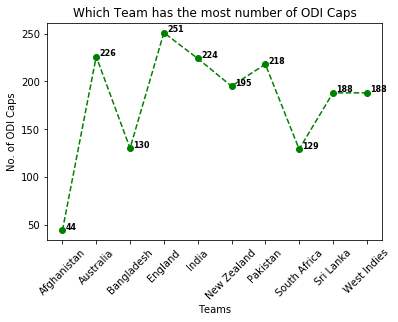

In [29]:
#Visualizing the total no. of players played ODI for each country
plt.plot(players_country, color='green', linestyle='--', marker='o')
plt.xlabel('Teams')
plt.ylabel('No. of ODI Caps')
plt.title('Which Team has the most number of ODI Caps')
plt.xticks(players_country.index, rotation = 45)
for i, v in enumerate(players_country):
    plt.text(i+0.1,v+1,v, fontsize=8,fontweight='bold')
plt.style.use('ggplot')
plt.show()

In [65]:
#Analysis : Players making debut for the country in a span of 5 years

##slicing the rows with the team name
def team(team_name):
    """Function to create a separate dataframe for each team"""
    team_df = batting_odi_1.loc[batting_odi_1['Team'] == team_name]
    team_df = team_df.reset_index().drop(['index'],axis = 1)
    return team_df

In [66]:
#Players making debut for India in a span of 5 year from (1971-2018)
def players_debut(df):
    """Function to calculate number of players making debut for a country in a span of 5 years from 1971 to 2018
    OUTPUT : Dataframe with number of players making debut in a span of 5 yrs"""
    players_7175 = 0
    players_7680 = 0
    players_8185 = 0
    players_8690 = 0
    players_9195 = 0
    players_9600 = 0
    players_0105 = 0
    players_0610 = 0
    players_1115 = 0
    players_1518 = 0

    for j in range(0,len(df)):
        if df['Debut'].values[j] >= 1971 and df['Debut'].values[j] <= 1975:
            players_7175 = players_7175 + 1
        elif df['Debut'].values[j] >= 1976 and df['Debut'].values[j] <= 1980:
            players_7680 = players_7680 + 1
        elif df['Debut'].values[j] >= 1981 and df['Debut'].values[j] <= 1985:
            players_8185 = players_8185 + 1
        elif df['Debut'].values[j] >= 1986 and df['Debut'].values[j] <= 1990:
            players_8690 = players_8690 + 1
        elif df['Debut'].values[j] >= 1991 and df['Debut'].values[j] <= 1995:
            players_9195 = players_9195 + 1
        elif df['Debut'].values[j] >= 1996 and df['Debut'].values[j] <= 2000:
            players_9600 = players_9600 + 1
        elif df['Debut'].values[j] >= 2001 and df['Debut'].values[j] <= 2005:
            players_0105 = players_0105 + 1
        elif df['Debut'].values[j] >= 2006 and df['Debut'].values[j] <= 2010:
            players_0610 = players_0610 + 1
        elif df['Debut'].values[j] >= 2011 and df['Debut'].values[j] <= 2015:
            players_1115 = players_1115 + 1
        else:
            players_1518 = players_1518 + 1

    df_debut_yr = {'Span' : ['1971-1975','1976-1980','1981-1985','1986-1990','1991-1995','1996-2000','2001-2005','2006-2010','2011-2015','After 2015'],
                'Players': [players_7175, players_7680, players_8185, players_8690, players_9195, players_9600, players_0105, players_0610, players_1115, players_1518]}
    df_debut_yr = pd.DataFrame(df_debut_yr)
    df_debut_yr = df_debut_yr.reindex(columns=['Span','Players'])
    return df_debut_yr

In [67]:
aus = team('Australia')
aus_debut = players_debut(aus)
ind = team('India')
ind_debut = players_debut(ind)

In [34]:
def plot_debut(df,team):
    """Function to plot the number of debut players"""

    plt.plot(df['Span'],df['Players'], marker='o',color='blue')
    plt.yticks([10,15,20,25,30,35,40,45])
    plt.xticks(rotation=30)
    plt.ylabel('Played Debuted')
    plt.xlabel('Debut Year')
    plt.title('Number of Players making Debut for ' + team + ' (1971-2018)')
    for i,v in enumerate(df['Players']):
        plt.text(i,v+1.1,v)
    plt.show()

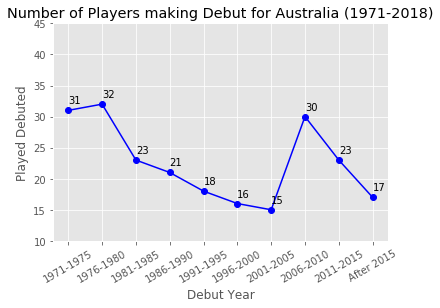

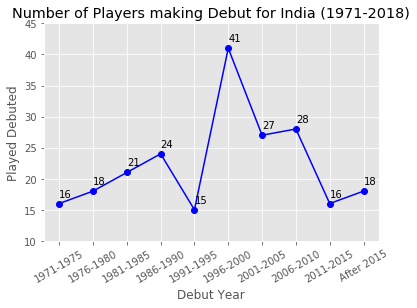

In [68]:
plot_debut(aus_debut,'Australia')
plot_debut(ind_debut,'India')

In [36]:
#Analysis : Number of Players making debut for each country since 2015
eng = team('England')
ind = team('India')
sa =  team('South Africa')
nz = team('New Zealand')
aus = team('Australia')
pak = team('Pakistan')
ban = team('Bangladesh')
sl = team('Sri Lanka')
wi = team('West Indies')
afg = team('Afghanistan')

team_list = [eng,ind,sa,nz,aus,pak,ban,sl,wi,afg]
list_players_1518 = []
for i in team_list:
    list_players_1518.append(players_debut(i).loc[9,'Players'])
list_players_1518 
# eng_2015 = 
# eng_debut
#aus_debut = debut_players(aus)

[8, 18, 14, 6, 17, 10, 12, 20, 18, 6]

In [38]:

debut_after_2015 = pd.DataFrame({ 'Teams' : ['England','India','South Africa','New Zealand','Australia','Pakistan','Bangladesh','Sri Lanka','West Indies','Afghanishtan'],
                               'Debut Players': list_players_1518})
debut_after_2015 = debut_after_2015.reindex(columns=['Teams','Debut Players'])
debut_after_2015 = debut_after_2015.sort_values('Teams').reset_index() #.drop(['index'],axis=1)
debut_after_2015 = debut_after_2015.drop(['index'],axis=1)
#debut_after_2015= debut_after_2015.drop(['level_0'],axis=1)

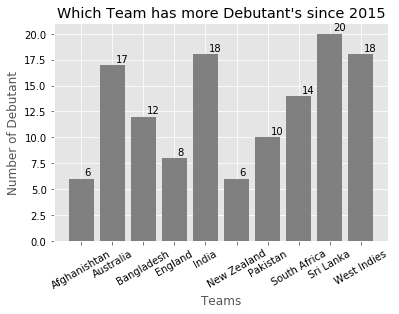

In [39]:
plt.bar(debut_after_2015['Teams'],debut_after_2015['Debut Players'], color='grey')
plt.xticks(rotation=30,color='black')
plt.yticks(color='black')
plt.ylabel('Number of Debutant')
plt.xlabel('Teams')
plt.title("Which Team has more Debutant's since 2015")
for i,v in enumerate(debut_after_2015['Debut Players']):
    plt.text(i+0.1,v+0.3,v)

plt.show()

In [40]:
#Analysis : Players with longest career Span
batting_odi_1
player_career = []
for j in range(0,len(batting_odi_1)):
    player_career.append((batting_odi_1['Player'].values[j], batting_odi_1['Debut'].values[j],
                          batting_odi_1['Retired/LastPlayed'].values[j],
                          batting_odi_1['Retired/LastPlayed'].values[j] - batting_odi_1['Debut'].values[j],
                          batting_odi_1['Team'].values[j]))

def func(player_career):
#     for i in range(0,len(player_career)):
      return player_career[3]
player_career = sorted(player_career, key = func, reverse=True)

    

In [41]:
#player_career

In [42]:
#Top 10 player with longest career span in ODI Cricket
player_career[0:10] 

[('SR Tendulkar', 1989, 2012, 23, 'India'),
 ('ST Jayasuriya', 1989, 2011, 22, 'Sri Lanka'),
 ('Javed Miandad', 1975, 1996, 21, 'Pakistan'),
 ('GA Gooch', 1976, 1995, 19, 'England'),
 ('CH Gayle', 1999, 2018, 19, 'West Indies'),
 ('Shahid Afridi', 1996, 2015, 19, 'Pakistan'),
 ('Shoaib Malik', 1999, 2018, 19, 'Pakistan'),
 ('Wasim Akram', 1984, 2003, 19, 'Pakistan'),
 ('PA de Silva', 1984, 2003, 19, 'Sri Lanka'),
 ('JH Kallis', 1996, 2014, 18, 'South Africa')]

In [43]:
name= []
start = []
end = []
span = []
team = []

for i in range(0,len(player_career)):
    name.append(player_career[i][0])
    start.append(player_career[i][1])
    end.append(player_career[i][2])
    span.append(player_career[i][3])
    team.append(player_career[i][4])

carrer_span = {'Player' : name,
               'Debut Year': start,
               'Retired Year/Last Played': end,
               'Span' : span,
               'Team': team}
carrer_span = pd.DataFrame(carrer_span)
carrer_span = carrer_span.reindex(columns=['Player','Debut Year','Retired Year/Last Played','Span','Team'])
carrer_span.head(20)

,Player,Debut Year,Retired Year/Last Played,Span,Team
0,SR Tendulkar,1989,2012,23,India
1,ST Jayasuriya,1989,2011,22,Sri Lanka
2,Javed Miandad,1975,1996,21,Pakistan
3,GA Gooch,1976,1995,19,England
4,CH Gayle,1999,2018,19,West Indies
5,Shahid Afridi,1996,2015,19,Pakistan
6,Shoaib Malik,1999,2018,19,Pakistan
7,Wasim Akram,1984,2003,19,Pakistan
8,PA de Silva,1984,2003,19,Sri Lanka
9,JH Kallis,1996,2014,18,South Africa


In [44]:
#Indian Players with longest career span in ODI Cricket
ind_carrer_10 = carrer_span.loc[carrer_span.Team == 'India', ['Player','Debut Year', 'Retired Year/Last Played','Span']].head(10)
ind_carrer_10 = ind_carrer_10.reset_index().reindex(columns = ['Player','Debut Year', 'Retired Year/Last Played','Span'])
ind_carrer_10

,Player,Debut Year,Retired Year/Last Played,Span
0,SR Tendulkar,1989,2012,23
1,Yuvraj Singh,2000,2017,17
2,Harbhajan Singh,1998,2015,17
3,A Kumble,1990,2007,17
4,N Kapil Dev,1978,1994,16
5,SC Ganguly,1992,2007,15
6,R Dravid,1996,2011,15
7,M Azharuddin,1985,2000,15
8,DB Vengsarkar,1976,1991,15
9,MS Dhoni,2004,2018,14


In [45]:
#Australian Players with longest career span in ODI Cricket
aus_carrer_10 = carrer_span.loc[carrer_span.Team == 'Australia', ['Player','Debut Year', 'Retired Year/Last Played','Span']].head(10)
aus_carrer_10 = aus_carrer_10.reset_index().reindex(columns = ['Player','Debut Year', 'Retired Year/Last Played','Span'])
aus_carrer_10

,Player,Debut Year,Retired Year/Last Played,Span
0,RT Ponting,1995,2012,17
1,SR Waugh,1986,2002,16
2,AR Border,1979,1994,15
3,ML Hayden,1993,2008,15
4,ME Waugh,1988,2002,14
5,DR Martyn,1992,2006,14
6,BJ Haddin,2001,2015,14
7,GD McGrath,1993,2007,14
8,SR Watson,2002,2015,13
9,CL White,2005,2018,13


In [46]:
#English Players with longest career span in ODI Cricket
eng_carrer_10 = carrer_span.loc[carrer_span.Team == 'England', ['Player','Debut Year', 'Retired Year/Last Played','Span']].head(10)
eng_carrer_10 = eng_carrer_10.reset_index().reindex(columns = ['Player','Debut Year', 'Retired Year/Last Played','Span'])
eng_carrer_10

,Player,Debut Year,Retired Year/Last Played,Span
0,GA Gooch,1976,1995,19
1,IT Botham,1976,1992,16
2,MW Gatting,1977,1993,16
3,AJ Stewart,1989,2003,14
4,N Hussain,1989,2003,14
5,DI Gower,1978,1991,13
6,LE Plunkett,2005,2018,13
7,JE Emburey,1980,1993,13
8,GP Swann,2000,2013,13
9,JM Anderson,2002,2015,13


In [47]:
#Pakistan Players with longest career span in ODI Cricket
pak_carrer_10 = carrer_span.loc[carrer_span.Team == 'Pakistan', ['Player','Debut Year', 'Retired Year/Last Played','Span']].head(10)
pak_carrer_10 = pak_carrer_10.reset_index().reindex(columns = ['Player','Debut Year', 'Retired Year/Last Played','Span'])
pak_carrer_10

,Player,Debut Year,Retired Year/Last Played,Span
0,Javed Miandad,1975,1996,21
1,Shahid Afridi,1996,2015,19
2,Shoaib Malik,1999,2018,19
3,Wasim Akram,1984,2003,19
4,Imran Khan,1974,1992,18
5,Saleem Malik,1982,1999,17
6,Inzamam-ul-Haq,1991,2007,16
7,Younis Khan,2000,2015,15
8,Mohammad Hafeez,2003,2018,15
9,Abdul Razzaq,1996,2011,15


In [48]:
#Analysis : Top 10 players with most runs in ODI Cricket
player_runs = batting_odi_1[['Player', 'Runs','100','50+','Team']].sort_values('Runs', ascending = False)
player_runs = player_runs.reset_index().reindex(columns = ['Player', 'Runs','100','50+','Team'])
player_runs_10 = player_runs.head(10)
player_runs_10


,Player,Runs,100,50+,Team
0,SR Tendulkar,18426,49,96,India
1,KC Sangakkara,13975,25,90,Sri Lanka
2,RT Ponting,13589,29,82,Australia
3,ST Jayasuriya,13364,28,68,Sri Lanka
4,DPMD Jayawardene,12381,18,75,Sri Lanka
5,Inzamam-ul-Haq,11701,10,83,Pakistan
6,JH Kallis,11550,17,86,South Africa
7,SC Ganguly,11221,22,71,India
8,R Dravid,10768,12,82,India
9,BC Lara,10348,19,62,West Indies


In [49]:
#Analysis : Top 10 players with most number of ODI Matches
player_matches = batting_odi_1[['Player', 'Matches','Team']].sort_values('Matches', ascending = False).head(10)
player_matches = player_matches.reset_index().reindex(columns = ['Player', 'Matches','Team'])
player_matches_10 = player_matches.head(10)
player_matches_10

,Player,Matches,Team
0,SR Tendulkar,463,India
1,DPMD Jayawardene,443,Sri Lanka
2,ST Jayasuriya,441,Sri Lanka
3,KC Sangakkara,397,Sri Lanka
4,Shahid Afridi,393,Pakistan
5,Inzamam-ul-Haq,375,Pakistan
6,RT Ponting,374,Australia
7,Wasim Akram,356,Pakistan
8,M Muralitharan,343,Sri Lanka
9,R Dravid,340,India


In [50]:
#Analysis : Top 10 leading run scorers for India in ODI Matches
ind_player_runs = player_runs.loc[player_runs.Team=='India',['Player','Runs']].reset_index().reindex(columns=['Player','Runs'])
ind_player_runs_10 = ind_player_runs.head(10)
ind_player_runs_10

#Analysis : Top 10 leading run scorers for Australia in ODI Matches
aus_player_runs = player_runs.loc[player_runs.Team=='Australia',['Player','Runs']].reset_index().reindex(columns=['Player','Runs'])
aus_player_runs_10 = aus_player_runs.head(10)
aus_player_runs_10

,Player,Runs
0,RT Ponting,13589
1,AC Gilchrist,9595
2,ME Waugh,8500
3,MJ Clarke,7981
4,SR Waugh,7569
5,MG Bevan,6912
6,AR Border,6524
7,ML Hayden,6131
8,DM Jones,6068
9,DC Boon,5964


In [51]:
#Analysis: Top 10 players with Highest ODI Score
player_best = batting_odi_1[['Player', 'BestScore*','BestScore','Team']].sort_values('BestScore', ascending=False).reset_index().reindex(columns=['Player','BestScore*','Team'])
player_best.columns = ['Player','Score','Team']
player_best_10 = player_best.head(10)
player_best_10

,Player,Score,Team
0,RG Sharma,264,India
1,MJ Guptill,237*,New Zealand
2,V Sehwag,219,India
3,CH Gayle,215,West Indies
4,Fakhar Zaman,210*,Pakistan
5,SR Tendulkar,200*,India
6,CK Coventry,194*,Zimbabwe
7,Saeed Anwar,194,Pakistan
8,ST Jayasuriya,189,Sri Lanka
9,IVA Richards,189*,West Indies


In [52]:
#Top 10 batsman in India with highest ODI Score
ind_best_score = player_best.loc[player_best.Team == 'India',['Player','Score']].reset_index().reindex(columns=['Player','Score'])
ind_best_score.head(10)

#Top 10 batsman in England with highest ODI Score
eng_best_score = player_best.loc[player_best.Team == 'England',['Player','Score']].reset_index().reindex(columns=['Player','Score'])
eng_best_score.head(10)

,Player,Score
0,JJ Roy,180
1,AD Hales,171
2,RA Smith,167*
3,DI Gower,158
4,AJ Strauss,158
5,CWJ Athey,142*
6,GA Gooch,142
7,IR Bell,141
8,JM Bairstow,141*
9,ME Trescothick,137


In [53]:
#Analysis: Top 10 players with most 100's in ODI Cricket
player_100 = batting_odi_1[['Player', '100','Team']].sort_values('100', ascending=False).reset_index().reindex(columns=['Player','100','Team'])
player_100
player_100_10 = player_100.head(10)
player_100_10

#Analysis: Top 10 players with most 50+'s in ODI Cricket
player_50 = batting_odi_1[['Player', '50+','Team']].sort_values('50+', ascending=False).reset_index().reindex(columns=['Player','50+','Team'])
player_50
player_50_10 = player_50.head(10)
player_50_10

,Player,50+,Team
0,SR Tendulkar,96,India
1,KC Sangakkara,90,Sri Lanka
2,JH Kallis,86,South Africa
3,Inzamam-ul-Haq,83,Pakistan
4,RT Ponting,82,Australia
5,R Dravid,82,India
6,DPMD Jayawardene,75,Sri Lanka
7,SC Ganguly,71,India
8,ST Jayasuriya,68,Sri Lanka
9,MS Dhoni,67,India


In [54]:
#Top 10 batsman in India with most 100's
ind_top_100 = player_100.loc[player_100.Team == 'India',['Player','100']].reset_index().reindex(columns=['Player','100'])
ind_top_100.head(10)

#Top 10 batsman in India with most 50+'s
ind_top_50 = player_50.loc[player_50.Team == 'India',['Player','50+']].reset_index().reindex(columns=['Player','50+'])
ind_top_50.head(10)


,Player,50+
0,SR Tendulkar,96
1,R Dravid,82
2,SC Ganguly,71
3,MS Dhoni,67
4,M Azharuddin,58
5,Yuvraj Singh,52
6,V Kohli,48
7,RG Sharma,37
8,V Sehwag,37
9,SK Raina,36


In [55]:
#Top 10 batsman in ODI Cricket with maximum balls faced
player_balls = batting_odi_1[['Player', 'BallsFaced','Runs','Team']].sort_values('BallsFaced', ascending=False).reset_index().reindex(columns=['Player', 'BallsFaced','Runs','Team'])
player_balls
player_balls_10 = player_balls.head(10)
player_balls_10


,Player,BallsFaced,Runs,Team
0,SR Tendulkar,21367,18426,India
1,KC Sangakkara,17715,13975,Sri Lanka
2,RT Ponting,16944,13589,Australia
3,JH Kallis,15793,11550,South Africa
4,Inzamam-ul-Haq,15769,11701,Pakistan
5,DPMD Jayawardene,15736,12381,Sri Lanka
6,SC Ganguly,15235,11221,India
7,R Dravid,15126,10768,India
8,ST Jayasuriya,14644,13364,Sri Lanka
9,DL Haynes,13707,8648,West Indies


In [56]:
#Top 10 Batsman in the world with most ducks
player_ducks = batting_odi_1[['Player', 'Ducks','Team']].sort_values('Ducks', ascending=False).reset_index().reindex(columns=['Player', 'Ducks','Team'])
player_ducks
player_ducks_10 = player_ducks.head(10)
player_ducks_10


,Player,Ducks,Team
0,ST Jayasuriya,34,Sri Lanka
1,Shahid Afridi,29,Pakistan
2,DPMD Jayawardene,28,Sri Lanka
3,Wasim Akram,28,Pakistan
4,SL Malinga,25,Sri Lanka
5,WPUJC Vaas,25,Sri Lanka
6,RS Kaluwitharana,24,Sri Lanka
7,M Muralitharan,24,Sri Lanka
8,CH Gayle,23,West Indies
9,DL Vettori,22,New Zealand


In [57]:
#Analysis: Total aggregate runs of each team
teams_runs = batting_odi_1.groupby('Team')['Runs'].sum()

In [58]:
teams_runs = teams_runs.sort_values(ascending=False)
teams_runs


Team
India           196864
Australia       193972
Pakistan        182603
Sri Lanka       163503
West Indies     151997
England         146444
New Zealand     145731
South Africa    128975
Zimbabwe         96493
Bangladesh       64616
Ireland          26492
Afghanistan      20428
Name: Runs, dtype: int32

In [59]:
#Top 10 Batsman in the world with highest average
batting_odi_2 = batting_odi_1[batting_odi_1['Matches']>100]
batting_odi_2
player_avg = batting_odi_2[['Player', 'Average','Team']].sort_values('Average', ascending=False).reset_index().reindex(columns=['Player', 'Average','Team'])
player_avg
player_avg_10 = player_avg.head(10)
player_avg_10


,Player,Average,Team
0,V Kohli,59.83,India
1,AB de Villiers,54.17,South Africa
2,MG Bevan,53.58,Australia
3,JE Root,51.52,England
4,MS Dhoni,49.74,India
5,HM Amla,49.65,South Africa
6,MEK Hussey,48.15,Australia
7,LRPL Taylor,47.91,New Zealand
8,RG Sharma,47.78,India
9,IVA Richards,47.00,West Indies


In [60]:
#Top 10 players in India with highest batting avg.
ind_avg = player_avg.loc[player_avg.Team == 'India',['Player','Average']].reset_index().reindex(columns=['Player','Average'])
ind_avg.head(10)


,Player,Average
0,V Kohli,59.83
1,MS Dhoni,49.74
2,RG Sharma,47.78
3,S Dhawan,45.69
4,SR Tendulkar,44.83
5,SC Ganguly,40.95
6,G Gambhir,39.68
7,R Dravid,39.15
8,A Jadeja,37.47
9,NS Sidhu,37.08
